# Posterior entropy

In [1]:
# Point Python to the path where we have installed the bad and darc packages
import sys
sys.path.insert(0, '/Users/btvincent/git-local/darc-experiments-python')

In [2]:
import pandas as pd
import numpy as np

import darc
from darc.delayed import models
from darc.designs import DARCDesign, Griskevicius2011delay, Frye, Koffarnus_Bickel, Kirby2009

from darc.data_plotting import plot_delay_without_front_end_delays
from darc_parameter_recovery import simulated_experiment_trial_loop

import matplotlib.pyplot as plt
%config InlineBackend.figure_format = 'retina'

In [20]:
true_params = pd.DataFrame.from_dict({'logk': [-4], 'α': [2]})

## run a simulated experiment

In [21]:
design_thing = DARCDesign(max_trials=40, 
                         RA=list(np.arange(5, 99+1, 1)), 
                         DB=list(np.arange(1, 365, 7)))

model = models.Hyperbolic(n_particles=5000)
model.θ_true = true_params

fitted_model, summary_stats = simulated_experiment_trial_loop(design_thing, model)

In [22]:
summary_stats.head()

,logk_entropy,logk_median,logk_mean,logk_lower50,logk_upper50,logk_lower95,logk_upper95
0,1.426404,-5.902790,-5.913461,-6.602525,-5.236019,-7.936899,-3.943326
1,0.875683,-4.820719,-4.740649,-5.098630,-4.433255,-5.640405,-3.448654
2,0.599887,-4.390175,-4.283572,-4.596155,-4.086410,-4.829841,-3.174762
3,0.505250,-3.937263,-3.817484,-4.088495,-3.637758,-4.332160,-2.810580
4,-0.145704,-4.052173,-4.023803,-4.121448,-3.923177,-4.470496,-3.587690


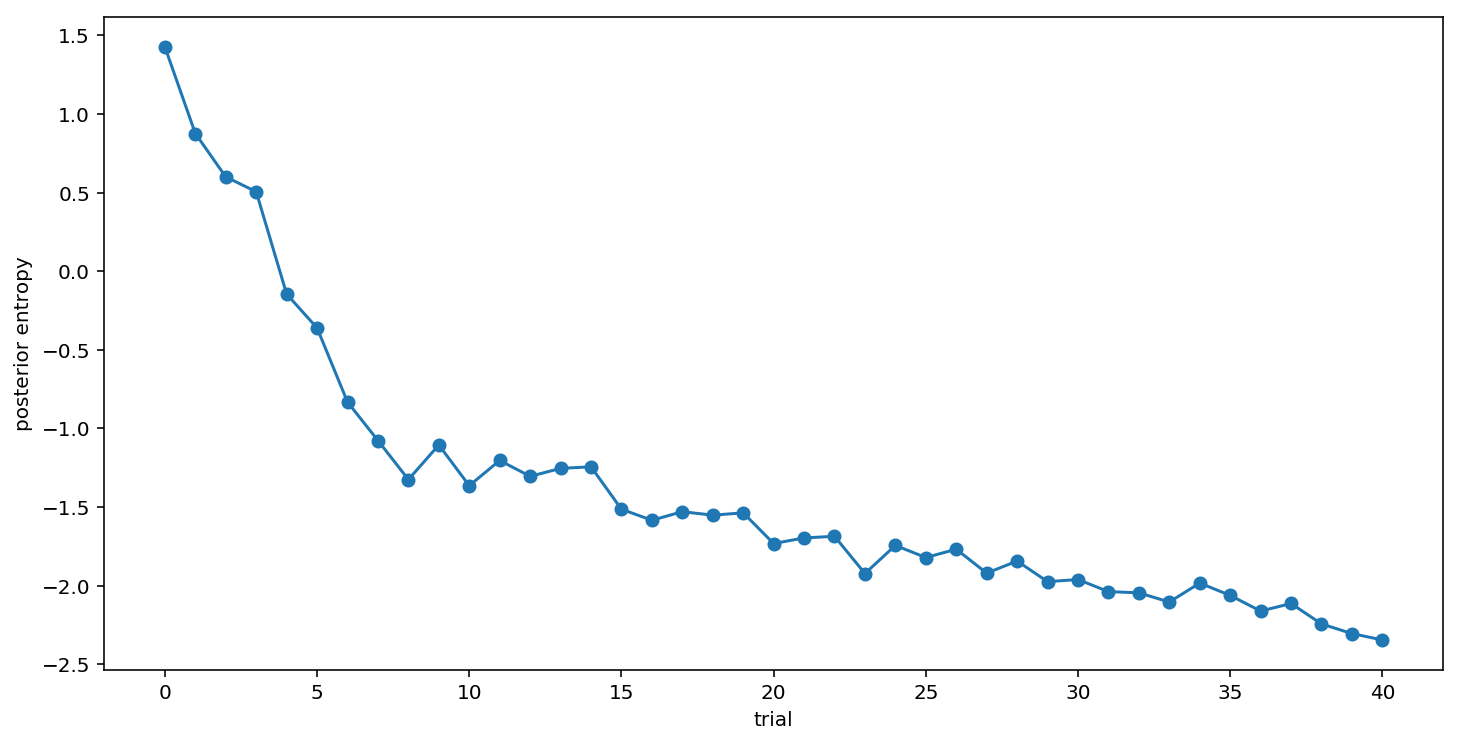

In [23]:
fig, ax = plt.subplots(figsize=(12, 6))

ax.plot(summary_stats['logk_entropy'], '-o')

ax.set_xlabel('trial')
ax.set_ylabel('posterior entropy');

## How does posterior entropy decrease over trials?

In [27]:
N_SIMULATIONS = 10  # should be 500 for the final plot to go in the paper

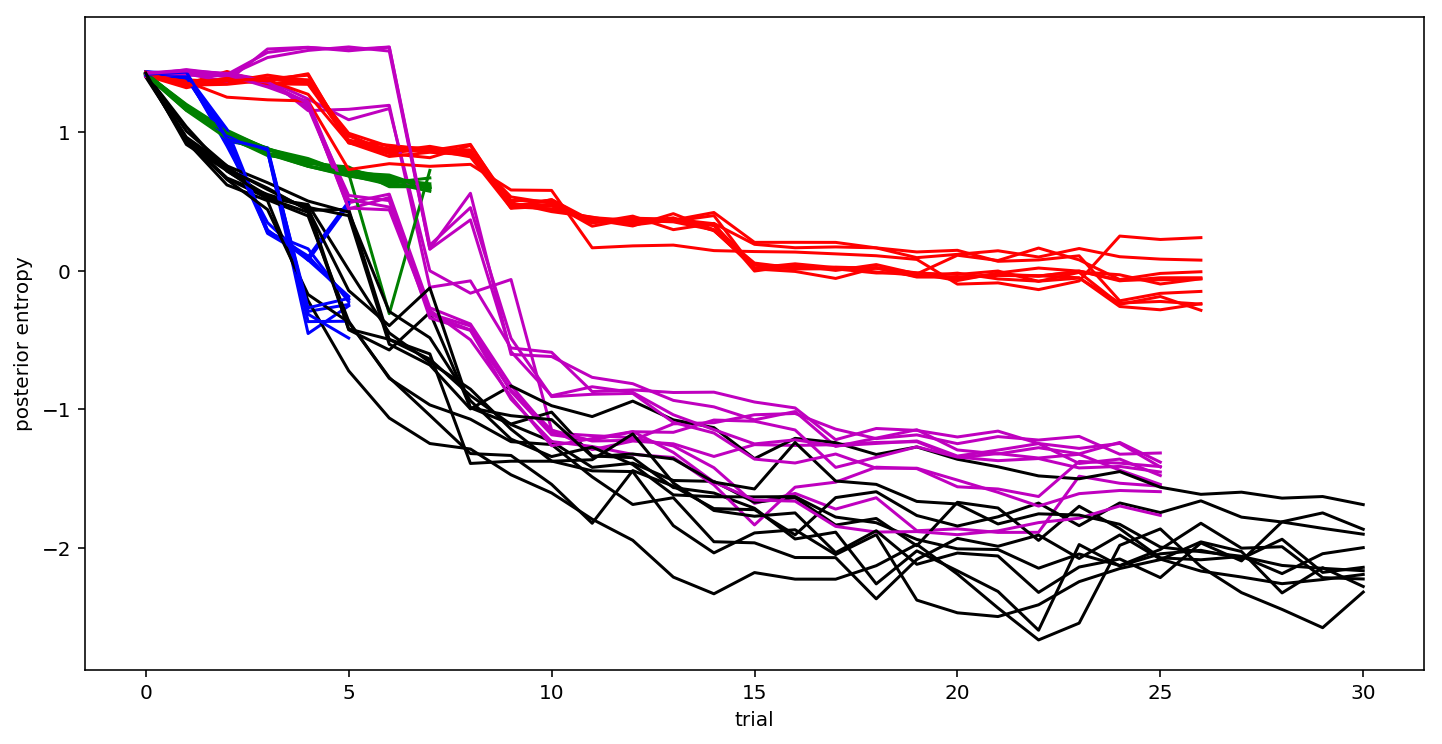

In [30]:
fig, ax = plt.subplots(figsize=(12, 6))

for n in range(N_SIMULATIONS):
    # Kirby ----------------------------------------------------------------------
    design_thing = Kirby2009()
    model = models.Hyperbolic(n_particles=5000)
    model.θ_true = true_params
    fitted_model, summary_stats = simulated_experiment_trial_loop(design_thing, model)
    ax.plot(summary_stats['logk_entropy'], 'r-')
    
    # Griskevicius2011delay ----------------------------------------------------------
    design_thing = Griskevicius2011delay()
    model = models.Hyperbolic(n_particles=5000)
    model.θ_true = true_params
    fitted_model, summary_stats = simulated_experiment_trial_loop(design_thing, model)
    ax.plot(summary_stats['logk_entropy'], 'g-')
    
    # Koffarnus_Bickel ----------------------------------------------------------
    design_thing = Koffarnus_Bickel()
    model = models.Hyperbolic(n_particles=5000)
    model.θ_true = true_params
    fitted_model, summary_stats = simulated_experiment_trial_loop(design_thing, model)
    ax.plot(summary_stats['logk_entropy'], 'b-')
    
    # Frye ----------------------------------------------------------
    design_thing = Frye()
    model = models.Hyperbolic(n_particles=5000)
    model.θ_true = true_params
    fitted_model, summary_stats = simulated_experiment_trial_loop(design_thing, model)
    ax.plot(summary_stats['logk_entropy'], 'm-')
    
    # our approach --------------------------------------------------------------
    design_thing = DARCDesign(max_trials=30, 
                              RA=list(np.arange(5, 99+1, 1)), 
                              DB=list(np.arange(1, 365, 7)))
    model = models.Hyperbolic(n_particles=5000)
    model.θ_true = true_params
    fitted_model, summary_stats = simulated_experiment_trial_loop(design_thing, model)
    ax.plot(summary_stats['logk_entropy'], 'k-')
    
    
    
ax.set_xlabel('trial')
ax.set_ylabel('posterior entropy');